### A01 - Regresión Polinomial

- Camila Daniela Zapata Castañeda
- Enero 23 del 2025

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
reg = LinearRegression()

In [4]:
df = pd.read_csv("Salarios_minimos.csv")

In [20]:
da = pd.read_csv("bateria_tableta.txt")

## Salario Mínimo

In [6]:
df.head(5)

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


Se tienen que escalar los datos dado que son muy grandes y si los tratar de elevar se vuelve imposible para la computadora trabajar con ellos. Por ende escalamos los por mediod e dividirlos entre 1000

In [7]:
df["Periodo"] = df["Periodo"]/1000

- ¿Qué es X en Salarios Mínimos? Periodo
- ¿Qué es Y en Salarios Mínimos? Salario

In [8]:
x = df["Periodo"].values
y = df["Salario"].values

In [9]:
import matplotlib.pyplot as plt

In [35]:
def regression(df, col_n_x, col_n_y, degree):

    x = np.reshape(df[col_n_x].values, [-1,1])
    y = np.reshape(df[col_n_y].values, [-1,1])
    
    
    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model = model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_

    r2 = model.score(X,y)

    y_pred = model.predict(X)
    print("r2 = ",r2)
    print('Intercepto: ', intercept[0])
    print('Coeficiente: ', coef[0])
    
    #gráfica
    plt.figure()
    plt.scatter(x, y)
    plt.scatter(x, y_pred, color = 'purple', label="predicción")
    plt.legend(loc="best")

r2 =  0.9844566663095191
Intercepto:  -5022.60217164145
Coeficiente:  [2528.32884781]


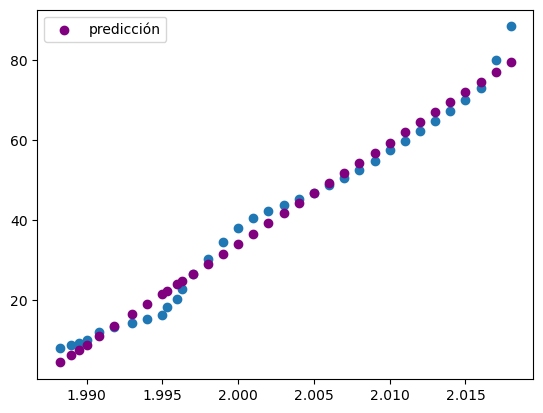

In [36]:
regression(df, "Periodo", "Salario", 1)

r2 =  0.9857366949575236
Intercepto:  -5217722.939438595
Coeficiente:  [ 7831462.41231154 -3919341.08591692   654024.49741491]


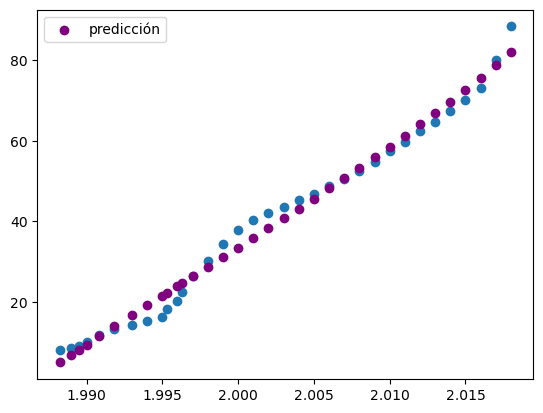

In [37]:
regression(df, "Periodo", "Salario",3)

r2 =  0.9961518450737559
Intercepto:  -42352907982.88304
Coeficiente:  [ 1.10317913e+11 -1.14740908e+11  5.95755843e+10 -1.54435768e+10
  1.59916459e+09]


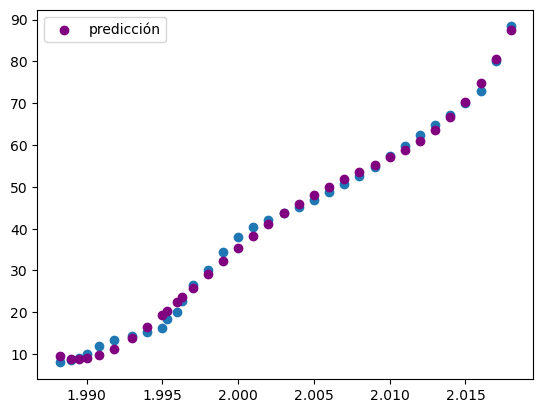

In [38]:
regression(df, "Periodo", "Salario", 5)

r2 =  0.9966110761484412
Intercepto:  -34707514759052.734
Coeficiente:  [ 6.82327277e+13 -2.27249740e+13 -4.72132062e+13  5.65797223e+13
 -2.68349323e+13  6.11079605e+12 -5.53133321e+11]


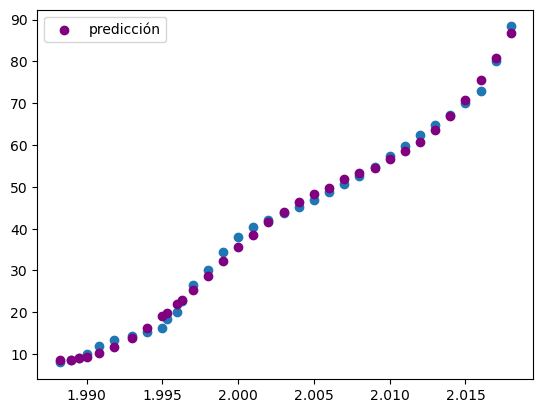

In [39]:
regression(df, "Periodo", "Salario", 7)

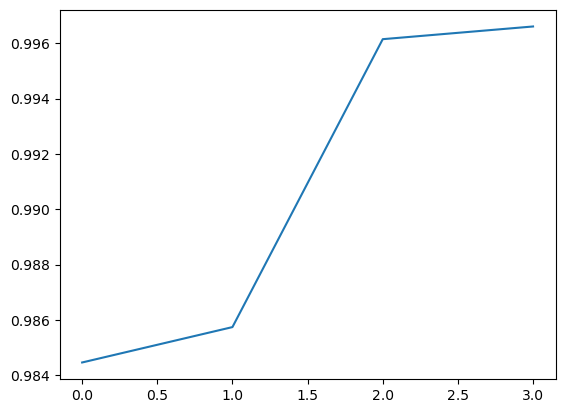

In [19]:
r_2 = [0.9844566663095191, 0.9857366949575236, 0.9961518450737559, 0.9966110761484412]
plt.plot(r_2)

## Bateria de Tablet

In [21]:
da.head(5)

,carga,duracion
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


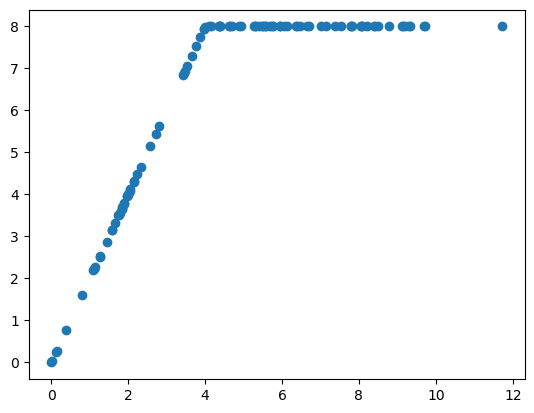

In [25]:
plt.scatter(da["carga"], da["duracion"])

Al ver que los datos más grande de cuatro ya no tienen ningún tipo de cambio no aportan ningún tipo de información y por ende solo hacen ruido innecesario a la regresión. Por eso solo dejamos los datos menores o iguales a 4 

In [26]:
da = da[da["carga"] <= 4]

- ¿Qué es X en Salarios Mínimos? Carga
- ¿Qué es Y en Salarios Mínimos? Duración

r2 =  1.0
Intercepto:  1.7763568394002505e-15
Coeficiente:  [2.]


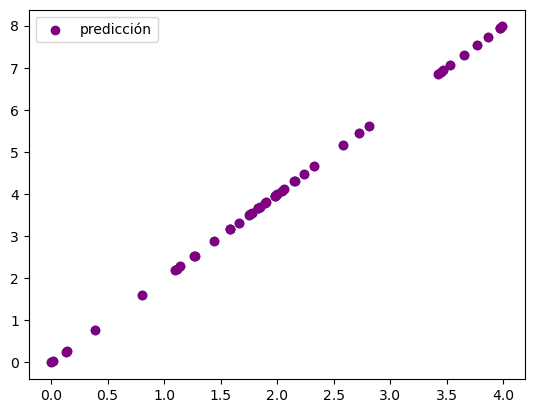

In [40]:
regression(da, "carga", "duracion", 1)

r2 =  1.0
Intercepto:  -1.7763568394002505e-15
Coeficiente:  [ 2.00000000e+00  4.40921028e-16 -1.12356078e-16]


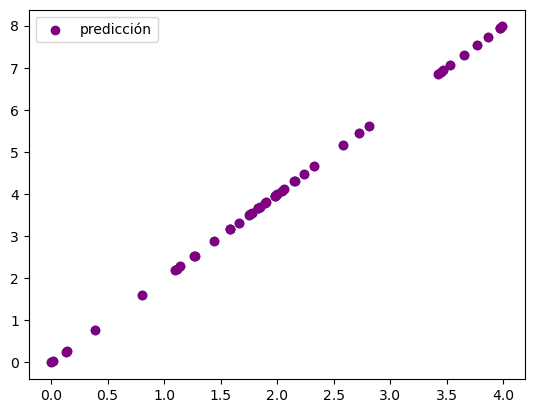

In [41]:
regression(da, "carga", "duracion", 3)

r2 =  1.0
Intercepto:  1.4210854715202004e-14
Coeficiente:  [ 2.00000000e+00  6.15951033e-15 -3.75065274e-15  9.93453030e-16
 -1.65804742e-16]


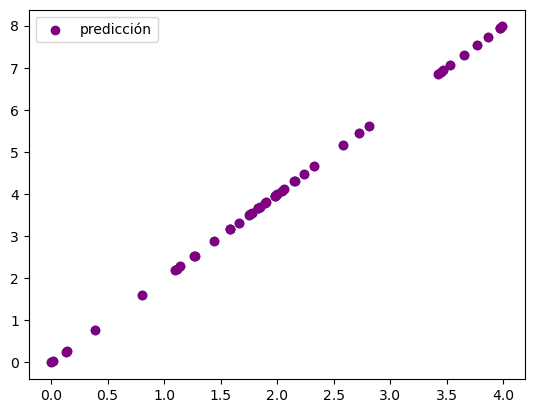

In [42]:
regression(da, "carga", "duracion", 5)

r2 =  1.0
Intercepto:  5.329070518200751e-15
Coeficiente:  [ 2.00000000e+00 -9.16603294e-17  1.55212552e-15  1.18676173e-15
 -1.68166968e-15  5.36416945e-16 -5.30768841e-17]


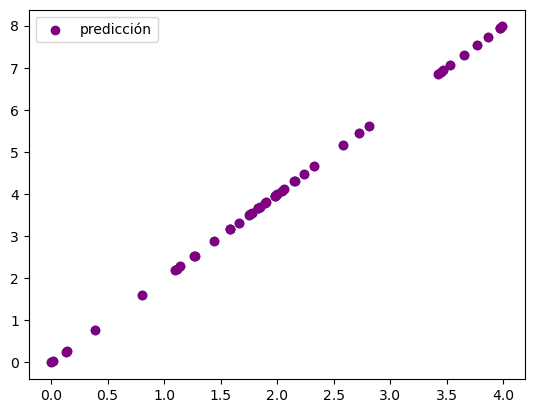

In [43]:
regression(da, "carga", "duracion", 7)

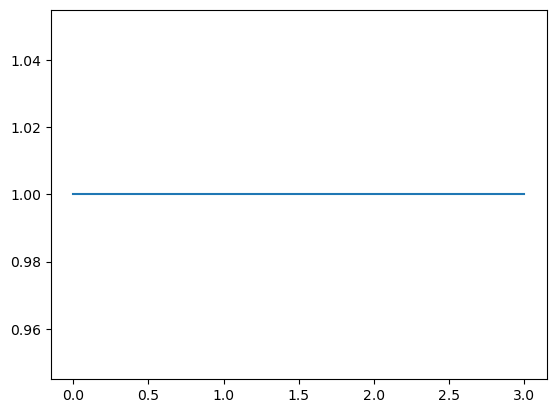

In [33]:
r_2 = [1, 1, 1, 1]
plt.plot(r_2)